<a href="https://colab.research.google.com/github/kgs12110/dap__/blob/main/201912437_DAP_PROJECT_fin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **독일 분데스리가 20-21 시즌 상위 4팀 선수 스탯 분석**


현대 축구에서 선수들의 스탯 자료는 단순히 선수들의 골과 도움을 카운팅하는 것이 아닌 선수의 개인 역량을 평가하고 더 나아가 선수들의 스탯으로 팀의 플레이 스타일을 대략적으로 판단하고 감독이 이후의 전술을 짜는데 중요한 자료가 된다.

예를 들어 xG와 xA값으로 팀의 공격 흐름과 찬스 메이킹 수준을 대략적으로 판단할 수 있는 것이다. 물론 스탯만으로 선수나 팀의 수준을 판단하는 것은 큰 오류를 범할 수 있다.

본 본석에서는 스탯 데이터를 기반으로 선수들을 분석하여 데이터를 도출하고 시각화를 진행한다.



---

**※**

Matches : 출전 경기 수

Starts : 선발 경기 수

Mins : 출전 시간 (분)

Passes_Attempted : 패스 시도

Perc_Passes_Completed : 패스 성공률

xG : 골 기대값

xA : 도움 기대값

**※**



---







# **참조 사이트** : 

**데이터 시각화 ->**

1. (https://justkode.kr/data-science/matplotlib-summary),

2. (https://dailyheumsi.tistory.com/36),

3. (https://wikidocs.net/92114)


**데이터 필터링, 정렬 등 ->** 

1. (https://k-glory.tistory.com/21),

2. (https://hogni.tistory.com/9),

3. (http://growthj.link/python-%EA%B5%AC%EA%B8%80-colab%EC%9C%BC%EB%A1%9C-pd-read-csv-%ED%99%9C%EC%9A%A9%ED%95%98%EB%8A%94-%EB%B0%A9%EB%B2%95/)

**데이터분석프로그래밍 강의 자료 pdf**


**csv 데이터 출처** : (https://www.kaggle.com/rajatrc1705/bundesliga-top-7-teams-offensive-stats/version/2?select=bundesliga_top7_v2.csv)






---



In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()
# csv 파일을 업로드해서 데이터를 불러오는 형식

Saving bundesliga_top7_v2.csv to bundesliga_top7_v2.csv


In [ ]:
df = pd.read_csv('bundesliga_top7_v2.csv', encoding = 'cp949')
df

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Manuel Neuer,Bayern Munich,GER,GK,34,33,33,2970,0,0,1316,86.3,0,0,0.00,0.01,1,0
1,Thomas M?ller,Bayern Munich,GER,MF,30,32,31,2674,11,19,1529,74.1,1,1,0.24,0.39,0,0
2,David Alaba,Bayern Munich,AUT,"DF,MF",28,32,30,2675,2,4,2251,85.1,0,0,0.04,0.08,4,0
3,J?r?me Boateng,Bayern Munich,GER,DF,31,29,29,2368,1,1,1964,89.4,0,0,0.01,0.02,6,0
4,Robert Lewandowski,Bayern Munich,POL,FW,31,29,28,2458,41,7,710,76.5,8,9,1.16,0.13,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,Loris Karius,Union Berlin,GER,GK,27,4,3,292,0,0,95,61.1,0,0,0.00,0.00,0,0
184,Akaki Gogia,Union Berlin,GER,FW,28,7,0,140,0,1,57,80.7,0,0,0.09,0.28,1,0
185,Leon Dajaku,Union Berlin,GER,FW,19,2,0,37,0,0,13,84.6,0,0,0.00,0.00,0,0
186,Tim Maciejewski,Union Berlin,GER,MF,19,1,0,8,0,0,3,66.7,0,0,0.00,0.00,0,0


독일 분데스리가의 1-4위 팀은 다음 시즌에 챔피언스리그로, 5-6위는 유로파리그로, 7위는 유로파 컨퍼런스리그에 진출한다.

따라서 Club 오브젝트의 필터링을 통해 국제 대회 팀들을 구분한다.


(7위 팀까지의 선수들을 분석할 계획이었지만, 분량 조절을 위해 4위 *챔피언스리그 진출팀 까지로 축소하여 분석.)



***※ 선수들의 스탯은 공격수 및 미드필더 위주. (수비수 스탯의 핵심인 태클 시도, 성공률 등의 부재)***



---



# **1위 : Bayern Munich (바이에른 뮌헨)**

먼저 선수의 골과 도움 기록을 분석 할 것이기 때문에 다른 스탯은 필터링한다.
그리고 sort_values를 통해 골과 도움을 내림차순으로 정렬한다.

※ 이 진행 방식은 다른 팀들에게도 적용.


In [ ]:
bayern_df = df[df.Club=='Bayern Munich']
bayern_df

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Manuel Neuer,Bayern Munich,GER,GK,34,33,33,2970,0,0,1316,86.3,0,0,0.00,0.01,1,0
1,Thomas M?ller,Bayern Munich,GER,MF,30,32,31,2674,11,19,1529,74.1,1,1,0.24,0.39,0,0
2,David Alaba,Bayern Munich,AUT,"DF,MF",28,32,30,2675,2,4,2251,85.1,0,0,0.04,0.08,4,0
3,J?r?me Boateng,Bayern Munich,GER,DF,31,29,29,2368,1,1,1964,89.4,0,0,0.01,0.02,6,0
4,Robert Lewandowski,Bayern Munich,POL,FW,31,29,28,2458,41,7,710,76.5,8,9,1.16,0.13,4,0
5,Joshua Kimmich,Bayern Munich,GER,MF,25,27,25,2194,4,10,2131,84.0,0,0,0.10,0.27,4,0
6,Kingsley Coman,Bayern Munich,FRA,"FW,MF",24,29,23,1752,5,10,856,79.4,0,0,0.21,0.34,1,0
7,Benjamin Pavard,Bayern Munich,FRA,DF,24,24,22,1943,0,0,1680,85.4,0,0,0.02,0.09,3,0
8,Alphonso Davies,Bayern Munich,CAN,DF,19,23,22,1763,1,2,1504,89.0,0,0,0.01,0.04,2,1
9,Serge Gnabry,Bayern Munich,GER,"FW,MF",25,27,20,1644,10,2,858,78.1,0,0,0.44,0.25,4,0


In [ ]:
bayern_goal = bayern_df.sort_values('Goals',ascending=False) # Goal 값 내림차순 정렬
bayern_goal[['Name','Goals','Assists']] # 'Name', 'Goals', 'Assists'만 결과 도출.

,Name,Goals,Assists
4,Robert Lewandowski,41,7
1,Thomas M?ller,11,19
9,Serge Gnabry,10,2
10,Leroy San?,6,9
15,Jamal Musiala,6,1
6,Kingsley Coman,5,10
11,Leon Goretzka,5,5
5,Joshua Kimmich,4,10
14,Eric Maxim Choupo-Moting,3,0
2,David Alaba,2,4


**Pie plot**과 **Bar plot**을 이용하여 선수들의 득점과 도움 비율을 시각화한다.   *bar plot의 색은 각 팀의 상징 색으로 설정한다.



● 전체 선수 28명 중 51.7%가 득점을 하였으며 몇몇 선수에게 득점이 치중되지 않고 골고루 분배되었음을 확인할 수 있었다.

● 최다 득점자는 41골을 기록한 Robert Lewandowski이다.

● 최다 득점 5명 > 1. Lewandowski : 41골 / 2. Muller : 11골 / 3. Gnabry : 10골 / 4. Sane : 6골 / 4. Musiala : 6골

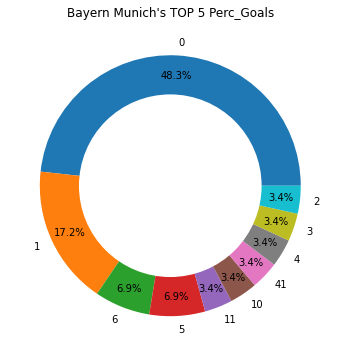

-----------------------------------------------------


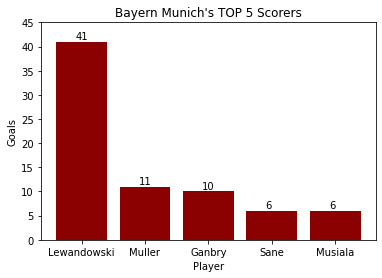

In [ ]:
goalCount = df[df.Club=='Bayern Munich']['Goals'].value_counts(normalize=True)

fig, ax = plt.subplots(figsize=(6,6))

ax.pie(goalCount,
       labels=goalCount.index,
       autopct='%.1f%%',
       pctdistance=0.85,
       )

circle = plt.Circle((0,0),0.70,fc='white')
ax.add_artist(circle)
plt.title("Bayern Munich's TOP 5 Perc_Goals")

plt.show()

# 강의 자료 pdf 참고

print('-----------------------------------------------------')

#####################################################


players = ['Lewandowski', 'Muller', 'Ganbry', 'Sane', 'Musiala']
goals = [41, 11, 10, 6, 6] 
xs = [i for i, _ in enumerate(players)]
plt.bar(xs, goals, color='darkred') # 막대 그래프 생성
plt.xlabel("Player")
plt.ylabel("Goals")
plt.xticks([i for i, _ in enumerate(players)], players) 
plt.title("Bayern Munich's TOP 5 Scorers")
plt.ylim(0, 45) # y 범위 설정

for index, value in enumerate(goals):
  plt.text(index - 0.1, value + 0.5, str(value))
plt.show()

# 코드 형식은 쭉 동일

● 팀 내 최다 도움은 Thomas Muller 이며 19개의 도움을 기록하였다.
위와 마찬가지로 시각화를 진행한다.


● 팀 내 최다 도움 5명 : 1. Muller : 19 도움 / 2. Kimmich : 10도움 / 3. Coman : 10도움 / 4. Sane : 9도움 / 5. Lewandowski : 7도움

● Thomas Muller는 10/10 (골과 도움을 각각 10회 이상 기록)을 달성 한 유일한 선수다.

● Lewandowski와 Muller는 골과 도움에서 각각 리그 1위를 차지하면서 높은 스탯을 기록하였다. 이를 통해 이 둘은 바이에른 뮌헨 공격의 핵심이라고 볼 수 있다.


In [ ]:
bayern_assist = bayern_df.sort_values('Assists',ascending=False)
bayern_assist[['Name','Assists','Goals']]

,Name,Assists,Goals
1,Thomas M?ller,19,11
5,Joshua Kimmich,10,4
6,Kingsley Coman,10,5
10,Leroy San?,9,6
4,Robert Lewandowski,7,41
11,Leon Goretzka,5,5
2,David Alaba,4,2
8,Alphonso Davies,2,1
9,Serge Gnabry,2,10
12,Lucas Hern?ndez,2,0


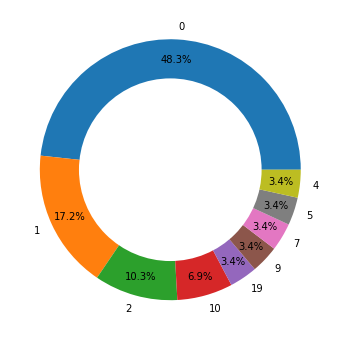

-----------------------------------------------------


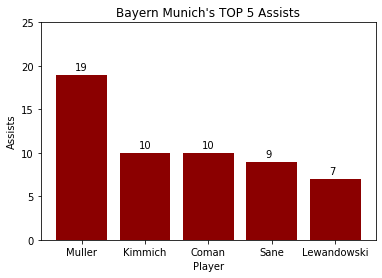

In [ ]:
typeCount = df[df.Club=='Bayern Munich']['Assists'].value_counts(normalize=True)

fig, ax = plt.subplots(figsize=(6,6))

ax.pie(typeCount,
       labels=typeCount.index,
       autopct='%.1f%%',
       pctdistance=0.85,
       )

circle = plt.Circle((0,0),0.70,fc='white')
ax.add_artist(circle)

plt.show()

print('-----------------------------------------------------')

#############################################

players = ['Muller', 'Kimmich', 'Coman', 'Sane', 'Lewandowski']
assists = [19, 10, 10, 9, 7]

xs = [i for i, _ in enumerate(players)]
plt.bar(xs, assists,color='darkred')
plt.xlabel("Player")
plt.ylabel("Assists")
plt.xticks([i for i, _ in enumerate(players)], players) 
plt.title("Bayern Munich's TOP 5 Assists")
plt.ylim(0, 25)

for index, value in enumerate(assists):
  plt.text(index - 0.1, value + 0.5, str(value))
plt.show()

**골 / 도움 산점도**

**scatter plot**을 이용해 공격포인트 TOP5 선수의 골과 도움을 산점도로 나타낸다.

**Lewandowski**는 41골 기록 때문에 우측으로 독보적인 위치에 있는게 특징이다.

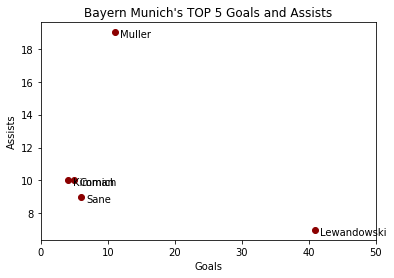

In [ ]:
goals = [41, 11, 6, 5, 4]
assists = [7, 19, 9, 10, 10]
players = ["Lewandowski", "Muller", "Sane", "Coman", "Kimmich"]
plt.scatter(goals, assists,color='darkred')

for goal, assist, player in zip(goals, assists, players):
  plt.annotate(player,xy=(goal, assist),xytext=(5, -5),textcoords="offset points")
plt.title("Bayern Munich's TOP 5 Goals and Assists")
plt.xlim(0, 50)
plt.xlabel("Goals")
plt.ylabel("Assists")
plt.show()

● 아래 패스 시도와 패스 성공률을 통해 David Alaba(Passes_Attempted : 2251, Perc_Passes_Completed : 85.1%) 와

Joshua Kimmich (Passes_Attempted : 2131, Perc_Passes_Completed : 84.0%),

Jerome Boateng (Passes_Attempted : 1964, Perc_Passes_Completed : 89.4%)의 패스를 통해 볼이 전개된다는 것을 알 수 있다.

● David Alaba와 Jerome Boateng은 포지션이 DF임을 보았을 때, 수비수들이 보통 볼을 많이 터치하기 때문에 이런 기록이 나올 수 있지만 바이에른 뮌헨은 수비수부터 차근차근 빌드업을 진행하거나 전방으로 한번에 찔러주는 패스를 선호한다는 것을 파악할 수 있다. 그렇기 때문에 바이에른 뮌헨은 킥력과 시야가 좋은 수비수를 선호할 것이다.



● 또한 수비수들의 높은 패스 시도와 성공률을 보았을 때, 바이에른 뮌헨은 수비수들이 높은 위치에서 볼을 전개하거나 볼 점유율이 높은 전형적인 강팀의 플레이 스타일을 구사한다고 볼 수 있다.



● 눈에 띄는 점은 골키퍼인 Manuel Neuer의 패스 시도와 성공률이 웬만한 필드 플레이어 수준이라는 것이다. 이것은 Manuel Neuer가 발기술이 좋고 빌드업 과정에서 중요한 역할을 하고 있다는 뜻이다.


In [ ]:
bayern_pass = bayern_df.sort_values('Passes_Attempted',ascending=False)
bayern_pass[['Name','Passes_Attempted', 'Perc_Passes_Completed']]

,Name,Passes_Attempted,Perc_Passes_Completed
2,David Alaba,2251,85.1
5,Joshua Kimmich,2131,84.0
3,J?r?me Boateng,1964,89.4
7,Benjamin Pavard,1680,85.4
1,Thomas M?ller,1529,74.1
8,Alphonso Davies,1504,89.0
0,Manuel Neuer,1316,86.3
13,Niklas S?le,1312,91.0
12,Lucas Hern?ndez,1307,84.7
11,Leon Goretzka,1059,88.0




---



# **2위 : RB Leipzig (RB 라이프치히)**

In [ ]:
RBL_df = df[df.Club=='RB Leipzig']
RBL_df

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
29,P?ter Gul?csi,RB Leipzig,HUN,GK,30,33,33,2970,0,0,1169,86.7,0,0,0.00,0.00,0,0
30,Dayot Upamecano,RB Leipzig,FRA,DF,21,29,27,2330,1,0,2192,89.1,0,0,0.04,0.04,6,0
31,Dani Olmo,RB Leipzig,ESP,"MF,FW",22,32,26,2194,5,9,1261,77.9,1,1,0.31,0.20,1,0
32,Willi Orban,RB Leipzig,HUN,DF,27,29,25,2363,4,1,2057,88.3,0,0,0.13,0.03,4,0
33,Angeli?o,RB Leipzig,ESP,"DF,FW",23,26,24,2161,4,4,1490,71.1,0,0,0.16,0.21,2,0
34,Marcel Sabitzer,RB Leipzig,AUT,MF,26,27,24,2026,8,3,1344,79.5,4,4,0.32,0.10,8,0
35,Kevin Kampl,RB Leipzig,SVN,MF,29,27,24,1932,0,1,1429,89.9,0,0,0.05,0.09,6,0
36,Amadou Haidara,RB Leipzig,MLI,"MF,DF",22,31,21,1905,3,1,1110,80.3,0,0,0.21,0.12,4,0
37,Tyler Adams,RB Leipzig,USA,"DF,MF",21,27,21,1850,1,1,1375,86.1,0,0,0.04,0.04,3,0
38,Nordi Mukiele,RB Leipzig,FRA,DF,22,28,21,1677,3,1,1144,77.9,0,0,0.12,0.08,5,0


In [ ]:
RBL_goal = RBL_df.sort_values('Goals',ascending=False)
RBL_goal[['Name','Goals','Assists']]

,Name,Goals,Assists
34,Marcel Sabitzer,8,3
39,Emil Forsberg,7,4
40,Christopher Nkunku,6,6
31,Dani Olmo,5,9
44,Alexander Sørloth,5,3
43,Yussuf Poulsen,5,4
32,Willi Orban,4,1
33,Angeli?o,4,4
45,Justin Kluivert,3,1
36,Amadou Haidara,3,1


● 전체 선수 25명 중 64%가 득점을 하였으며 몇몇 선수에게 득점이 치중되지 않고 골고루 분배되었음을 확인할 수 있었다. 이는 1위 팀 바이에른 뮌헨보다 높은 수치이다.

● 최다 득점자는 8골을 기록한 Marcel Sabitzer다.

● 최다 득점 5명 > 1. Sabitzer : 8골 / 2. Forsberg : 7골 / 3. Nkunku : 6골 / 4. Olmo : 5골 / 4. Poulsen : 5골

● 상위권 득점자들의 차이가 많이 나지 않는 것이 특징이며 최다 득점자가 8골임을 보았을 때 리그 2위를 차지한 것은 수비력이 타 팀들보다 뛰어났기 때문이라는 것을  예측할 수 있다.

실제로 리그 34경기 중 32실점을 하였으며 이는 리그 우승팀 바이에른 뮌헨의 44실점보다 적었고 리그에서 최저 실점을 기록하였다.

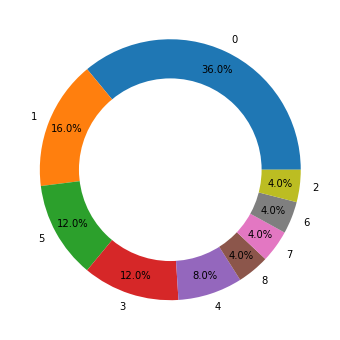

-----------------------------------------------------


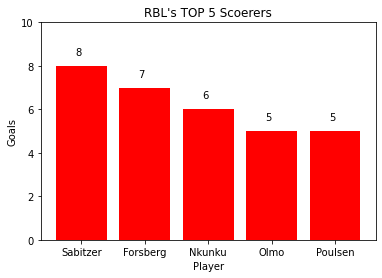

In [ ]:
typeCount = df[df.Club=='RB Leipzig']['Goals'].value_counts(normalize=True)

fig, ax = plt.subplots(figsize=(6,6))

ax.pie(typeCount,
       labels=typeCount.index,
       autopct='%.1f%%',
       pctdistance=0.85,
       )

circle = plt.Circle((0,0),0.70,fc='white')
ax.add_artist(circle)

plt.show()

print('-----------------------------------------------------')

players = ['Sabitzer', 'Forsberg', 'Nkunku', 'Olmo', 'Poulsen']
assists = [8, 7, 6, 5, 5]

xs = [i for i, _ in enumerate(players)]
plt.bar(xs, assists,color='red')
plt.xlabel("Player")
plt.ylabel("Goals")
plt.xticks([i for i, _ in enumerate(players)], players) 
plt.title("RBL's TOP 5 Scoerers")
plt.ylim(0, 10)

for index, value in enumerate(assists):
  plt.text(index - 0.1, value + 0.5, str(value))
plt.show()

팀 내 최다 도움은 Dani Olmo	이며 9개의 도움을 기록하였다.


팀 내 최다 도움 5명 : 1. Olmo : 9 도움 / 2. Nkunku : 6도움 / 3. Forsberg : 4도움 / 3. Poulsen : 4도움 / 3. Angeli?o	 : 4도움


In [ ]:
RBL_assist = RBL_df.sort_values('Assists',ascending=False)
RBL_assist[['Name','Assists','Goals']]

,Name,Assists,Goals
31,Dani Olmo,9,5
40,Christopher Nkunku,6,6
39,Emil Forsberg,4,7
33,Angeli?o,4,4
43,Yussuf Poulsen,4,5
44,Alexander Sørloth,3,5
34,Marcel Sabitzer,3,8
41,Marcel Halstenberg,2,2
37,Tyler Adams,1,1
38,Nordi Mukiele,1,3


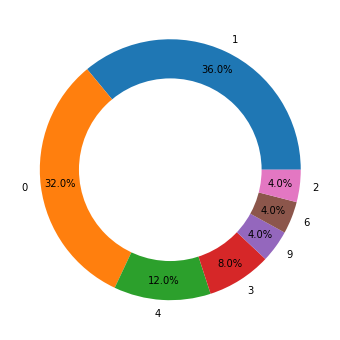

-----------------------------------------------------


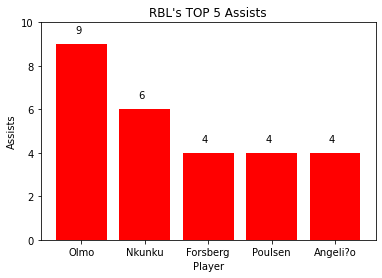

In [ ]:
typeCount = df[df.Club=='RB Leipzig']['Assists'].value_counts(normalize=True)

fig, ax = plt.subplots(figsize=(6,6))

ax.pie(typeCount,
       labels=typeCount.index,
       autopct='%1.1f%%',
       pctdistance=0.85,
       )

circle = plt.Circle((0,0),0.70,fc='white')
ax.add_artist(circle)

plt.show()

print('-----------------------------------------------------')

##################################################

players = ['Olmo','Nkunku', 'Forsberg', 'Poulsen','Angeli?o']
assists = [9, 6, 4, 4, 4]

xs = [i for i, _ in enumerate(players)]
plt.bar(xs, assists,color='red')
plt.xlabel("Player")
plt.ylabel("Assists")
plt.xticks([i for i, _ in enumerate(players)], players) 
plt.title("RBL's TOP 5 Assists")
plt.ylim(0, 10)

for index, value in enumerate(assists):
  plt.text(index - 0.1, value + 0.5, str(value))
plt.show()

**골 / 도움 산점도**

기록이 서로 비슷하기 때문에 Olmo를 제외한 4명의 선수는 비슷한 곳에 위치해있다.

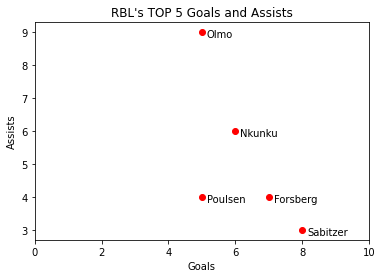

In [ ]:
goals = [5, 6, 8, 7, 5]
assists = [9, 6, 3, 4, 4]
players = ["Olmo", "Nkunku", "Sabitzer", "Forsberg", "Poulsen"]
plt.scatter(goals, assists, color='red')

for goal, assist, player in zip(goals, assists, players):
  plt.annotate(player,xy=(goal, assist),xytext=(5, -5),textcoords="offset points")
plt.title("RBL's TOP 5 Goals and Assists")
plt.xlim(0, 10)
plt.xlabel("Goals")
plt.ylabel("Assists")
plt.show()

라이프치히 역시 바이에른 뮌헨과 마찬가지로 DF 포지션인 Dayot Upamecano (Passes_Attempted : 2192, Perc_Passes_Completed : 89.1%) 와

Willi Orban (Passes_Attempted : 2057, Perc_Passes_Completed : 88.3%)의 패스 시도와 성공률이 가장 높다.

이 또한 볼 전개가 수비수부터 시작된다는 의미다.
이 두 센터백들이 풀백 포지션인 Marcel Halstenberg와 Angeli?o에게 볼을 전달하면서 측면으로 벌려주고 두 풀백들이 사이드에서 Kampl, Adams, Sabitzer, Olmo와 같은 2,3선 자원들에게 볼을 전달한다. 또는 패스 플레이를 통해 다시 풀백에게 전달 후 풀백이 컷백을 통한 공격 루트를 사용할 수도 있다. 이와 같이 발기술이 좋은 센터백을 기용하면 공격루트가 더 다양해진다는 결과를 낳을 수 있다.

In [ ]:
RBL_pass = RBL_df.sort_values('Passes_Attempted',ascending=False)
RBL_pass[['Name','Passes_Attempted', 'Perc_Passes_Completed']]

,Name,Passes_Attempted,Perc_Passes_Completed
30,Dayot Upamecano,2192,89.1
32,Willi Orban,2057,88.3
41,Marcel Halstenberg,1638,87.8
33,Angeli?o,1490,71.1
35,Kevin Kampl,1429,89.9
37,Tyler Adams,1375,86.1
34,Marcel Sabitzer,1344,79.5
31,Dani Olmo,1261,77.9
29,P?ter Gul?csi,1169,86.7
42,Lukas Klostermann,1153,88.4


# **3위 : Borussia Dortmund (보루시아 도르트문트)**

In [ ]:
Dortmund_df = df[df.Club=='Borussia Dortmund']
Dortmund_df


,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
54,Mats Hummels,Borussia Dortmund,GER,DF,31,33,32,2813,5,0,2581,88.8,0,0,0.11,0.03,6,0
55,Erling Haaland,Borussia Dortmund,NOR,FW,20,28,27,2407,27,6,490,73.5,2,4,0.89,0.20,2,0
56,Marco Reus,Borussia Dortmund,GER,"MF,FW",31,32,27,2279,8,6,1145,79.8,0,2,0.40,0.32,1,0
57,Manuel Akanji,Borussia Dortmund,SUI,DF,25,28,26,2350,2,0,2097,92.9,0,0,0.07,0.00,4,0
58,Rapha?l Guerreiro,Borussia Dortmund,POR,DF,26,27,25,2218,5,10,2146,86.6,0,0,0.16,0.28,1,0
59,Jadon Sancho,Borussia Dortmund,ENG,"FW,MF",20,26,24,2062,8,11,1474,78.7,1,1,0.32,0.30,0,0
60,Emre Can,Borussia Dortmund,GER,"DF,MF",26,28,23,2133,1,4,1816,87.3,0,0,0.03,0.10,5,0
61,Gio Reyna,Borussia Dortmund,USA,"FW,MF",17,32,23,1976,4,5,969,79.3,0,0,0.20,0.20,1,0
62,Jude Bellingham,Borussia Dortmund,ENG,MF,17,29,19,1697,1,3,1068,83.2,0,0,0.16,0.18,6,1
63,Roman B?rki,Borussia Dortmund,SUI,GK,29,19,18,1665,0,0,629,81.9,0,0,0.00,0.00,0,0


In [ ]:
Dortmund_goal = Dortmund_df.sort_values('Goals',ascending=False)
Dortmund_goal[['Name','Goals','Assists']]

,Name,Goals,Assists
55,Erling Haaland,27,6
56,Marco Reus,8,6
59,Jadon Sancho,8,11
54,Mats Hummels,5,0
58,Rapha?l Guerreiro,5,10
61,Gio Reyna,4,5
76,Youssoufa Moukoko,3,0
64,Julian Brandt,3,2
57,Manuel Akanji,2,0
68,Thomas Delaney,1,1


● 전체 선수 26명 중 69.2%가 득점을 하였으며 역시 몇몇 선수에게 득점이 치중되지 않고 골고루 분배되었음을 확인할 수 있었다. 1골도 득점을 하지 못한 선수 중 2명이 골키퍼임을 감안하면 무득점자는 6명뿐이다.

● 최다 득점자는 27골을 기록한 Erling Haaland다.

● 눈에 띄는 점은 수비수인 Mats Hummels가 5골을 기록하며 팀 내 득점 5위 안에 기록되었다는 것이다. 수비수가 보통 전방에 있는 경우가 드물다는 것을 고려하면 세트피스 상황을 많이 이용했다고 예상할 수 있다.
(*세트피스 : 프리킥, 코너킥 등과 같이 데드볼 상황에서 이루어지는 약속 된 플레이)

● 최다 득점 5명 > 1. Erling Haaland : 27골 / 2. Jadon Sancho	 : 8골 / 3. Marco Reus : 8골 / 4. Rapha?l Guerreiro : 5골 / 4. Mats Hummels : 5골

● 바이에른 뮌헨처럼 한 선수가 많은 득점을 기록하였다.

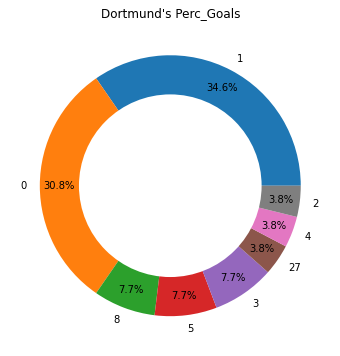

-----------------------------------------------------


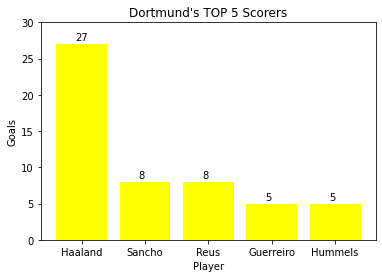

In [ ]:
typeCount = df[df.Club=='Borussia Dortmund']['Goals'].value_counts(normalize=True)

fig, ax = plt.subplots(figsize=(6,6))

ax.pie(typeCount,
       labels=typeCount.index,
       autopct='%1.1f%%',
       pctdistance=0.85,
       )

circle = plt.Circle((0,0),0.70,fc='white')
ax.add_artist(circle)
plt.title("Dortmund's Perc_Goals")

plt.show()

print('-----------------------------------------------------')

################################################

players = ['Haaland', 'Sancho', 'Reus', 'Guerreiro', 'Hummels']
goals = [27, 8, 8, 5, 5]

xs = [i for i, _ in enumerate(players)]
plt.bar(xs, goals, color='yellow')
plt.xlabel("Player")
plt.ylabel("Goals")
plt.xticks([i for i, _ in enumerate(players)], players) 
plt.title("Dortmund's TOP 5 Scorers")
plt.ylim(0, 30)

for index, value in enumerate(goals):
  plt.text(index - 0.1, value + 0.5, str(value))
plt.show()

● 팀 내 최다 도움은 Jadon Sancho이며 11개의 도움을 기록하였다.

● 팀 내 최다 도움 5명 : 1. Sancho : 11 도움 / 2. Gyerreiro : 10도움 / 3. Haaland : 6도움 / 4. Reus : 6도움 / 5. Reyna : 5도움


● 눈에 띄는 점은 Haaland, Sancho, Gyerreiro, Reus가 골, 도움 모두 TOP5 안에 들었다는 것이다. 이는 재능 있는 선수들이 많다고 볼 수 있지만 한편으로는 공격 전술이 몇몇 선수들에게 의존되고 있다고도 해석할 수 있다.


In [ ]:
Dortmund_assist = Dortmund_df.sort_values('Assists',ascending=False)
Dortmund_assist[['Name','Assists','Goals']]

,Name,Assists,Goals
59,Jadon Sancho,11,8
58,Rapha?l Guerreiro,10,5
55,Erling Haaland,6,27
56,Marco Reus,6,8
61,Gio Reyna,5,4
60,Emre Can,4,1
71,Thorgan Hazard,3,1
62,Jude Bellingham,3,1
70,Mateu Morey,2,0
64,Julian Brandt,2,3


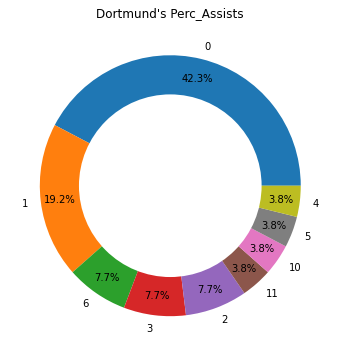

-----------------------------------------------------


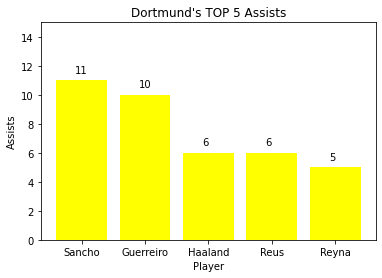

In [ ]:
typeCount = df[df.Club=='Borussia Dortmund']['Assists'].value_counts(normalize=True)

fig, ax = plt.subplots(figsize=(6,6))

ax.pie(typeCount,
       labels=typeCount.index,
       autopct='%1.1f%%',
       pctdistance=0.85,
       )

circle = plt.Circle((0,0),0.70,fc='white')
ax.add_artist(circle)
plt.title("Dortmund's Perc_Assists")

plt.show()

print('-----------------------------------------------------')

#############################################

players = ['Sancho', 'Guerreiro', 'Haaland', 'Reus', 'Reyna']
assists = [11, 10, 6, 6, 5]

xs = [i for i, _ in enumerate(players)]
plt.bar(xs, assists, color='yellow')
plt.xlabel("Player")
plt.ylabel("Assists")
plt.xticks([i for i, _ in enumerate(players)], players) 
plt.title("Dortmund's TOP 5 Assists")
plt.ylim(0, 15)

for index, value in enumerate(assists):
 plt.text(index - 0.1, value + 0.5, str(value))
plt.show()

**골 / 도움 산점도**


**Haaland**의 27골로 바이에른 뮌헨처럼 한 선수 혼자 우측에 위치 해 있는 모습이다.

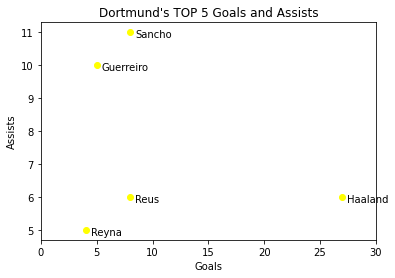

In [ ]:
goals = [27, 8, 5, 8, 4]
assists = [6, 11, 10, 6, 5]
players = ["Haaland", "Sancho", "Guerreiro", "Reus", "Reyna"]
plt.scatter(goals, assists, color='yellow')

for goal, assist, player in zip(goals, assists, players):
  plt.annotate(player,xy=(goal, assist),xytext=(5, -5),textcoords="offset points")
plt.title("Dortmund's TOP 5 Goals and Assists")
plt.xlim(0, 30)
plt.xlabel("Goals")
plt.ylabel("Assists")
plt.show()

● Mats Hummels (Passes_Attempted : 2581, Perc_Passes_Completed : 88.8%)와

Rapha?l Guerreiro	(Passes_Attempted : 2146, Perc_Passes_Completed : 86.6%)가 빌드업의 주축임을 확인할 수 있다.



● Manuel Akanji는 패스 시도가 2000회가 넘는데도 성공률이 92.9%에 이르는 정확성을 보여주고 있다.

● B?rk와 Hitz 두 골키퍼의 패스 시도 합이 1179회로 바이에른 뮌헨 골키퍼 Manuel Neuer의 1316회에 미치지 못한다. 이는 Nener의 발기술이 얼마나 대단한지를 알 수 있다.

In [ ]:
Dortmund_pass = Dortmund_df.sort_values('Passes_Attempted',ascending=False)
Dortmund_pass[['Name','Passes_Attempted', 'Perc_Passes_Completed']]

,Name,Passes_Attempted,Perc_Passes_Completed
54,Mats Hummels,2581,88.8
58,Rapha?l Guerreiro,2146,86.6
57,Manuel Akanji,2097,92.9
60,Emre Can,1816,87.3
59,Jadon Sancho,1474,78.7
65,Thomas Meunier,1253,81.7
56,Marco Reus,1145,79.8
62,Jude Bellingham,1068,83.2
61,Gio Reyna,969,79.3
67,Mahmoud Dahoud,913,86.1




---



# **4위 : Wolfsburg (볼프스부르크)**

In [ ]:
Wolf_df = df[df.Club=='Wolfsburg']
Wolf_df

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
80,Wout Weghorst,Wolfsburg,NED,FW,27,34,33,2941,20,8,832,67.8,2,3,0.55,0.15,3,0
81,Koen Casteels,Wolfsburg,BEL,GK,28,32,32,2880,0,0,1247,75.2,0,0,0.00,0.00,0,0
82,John Brooks,Wolfsburg,USA,DF,27,32,31,2774,2,0,1869,84.8,0,0,0.05,0.02,5,0
83,Ridle Baku,Wolfsburg,GER,"FW,DF",22,32,31,2678,6,7,1461,75.0,0,0,0.11,0.15,1,0
84,Xaver Schlager,Wolfsburg,AUT,MF,22,32,30,2626,2,4,1279,77.2,0,0,0.10,0.11,7,0
85,Maximilian Arnold,Wolfsburg,GER,MF,26,30,30,2585,3,6,1652,80.1,0,0,0.07,0.17,7,1
86,Maxence Lacroix,Wolfsburg,FRA,DF,20,30,29,2590,1,1,1736,84.1,0,0,0.05,0.01,5,0
87,Josip Brekalo,Wolfsburg,CRO,FW,22,29,22,1814,7,3,849,75.3,0,0,0.18,0.17,1,0
88,Yannick Gerhardt,Wolfsburg,GER,"MF,FW",26,29,21,1936,2,4,764,74.2,0,0,0.18,0.16,3,0
89,Paulo Ot?vio,Wolfsburg,BRA,DF,25,23,19,1737,0,2,989,75.0,0,0,0.03,0.10,7,1


In [ ]:
Wolf_goal = Wolf_df.sort_values('Goals',ascending=False)
Wolf_goal[['Name','Goals','Assists']]

,Name,Goals,Assists
80,Wout Weghorst,20,8
87,Josip Brekalo,7,3
83,Ridle Baku,6,7
93,Maximilian Philipp,6,2
91,Renato Steffen,5,4
85,Maximilian Arnold,3,6
84,Xaver Schlager,2,4
82,John Brooks,2,0
88,Yannick Gerhardt,2,4
99,Bartosz Bialek,2,0


● 전체 선수 26명 중 46.2%가 득점을 하였으며 앞서 먼저 분석했던 상위권 팀들보다는 득점 비율이 가장 적은 것을 확인할 수 있다.

● 최다 득점자는 20골을 기록한 Wout Weghorst이다.

● 최다 득점 5명 > 1. Weghorst : 20골 / 2. Brekalo : 7골 / 3. Baku : 6골 / 3. Philipp : 6골 / 5. Steffen : 5골

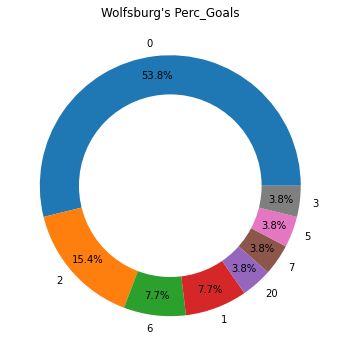

-----------------------------------------------------


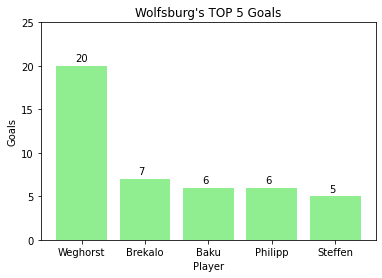

In [ ]:
goalCount = df[df.Club=='Wolfsburg']['Goals'].value_counts(normalize=True)

fig, ax = plt.subplots(figsize=(6,6))

ax.pie(goalCount,
       labels=goalCount.index,
      autopct='%.1f%%',
       pctdistance=0.85,
      
       
       )

circle = plt.Circle((0,0),0.70,fc='white')
ax.add_artist(circle)
plt.title("Wolfsburg's Perc_Goals")

plt.show()

print('-----------------------------------------------------')

##################################################

players = ['Weghorst', 'Brekalo', 'Baku', 'Philipp', 'Steffen']
goals = [20, 7, 6, 6, 5]

xs = [i for i, _ in enumerate(players)]
plt.bar(xs, goals, color='lightgreen')
plt.xlabel("Player")
plt.ylabel("Goals")
plt.xticks([i for i, _ in enumerate(players)], players) 
plt.title("Wolfsburg's TOP 5 Goals")
plt.ylim(0, 25)

for index, value in enumerate(goals):
  plt.text(index - 0.1, value + 0.5, str(value))
plt.show()

● 팀 내 최다 도움도 득점과 마찬가지로 Wout Weghorst이며 8개의 도움을 기록하였다.

● 팀 내 최다 도움 5명 : 1.  Weghorst : 8도움 / 2. Baku : 7도움 / 3. Arnold : 6도움 / 4. Steffen : 4도움 / 4. Schlager : 4도움

● Weghorst는 상위 4팀 중 한 선수가 골과 도움 모두 팀 내 1위인 유일한 선수다.


In [ ]:
Wolf_assist = Wolf_df.sort_values('Assists',ascending=False)
Wolf_assist[['Name','Assists','Goals']]

,Name,Assists,Goals
80,Wout Weghorst,8,20
83,Ridle Baku,7,6
85,Maximilian Arnold,6,3
91,Renato Steffen,4,5
84,Xaver Schlager,4,2
88,Yannick Gerhardt,4,2
87,Josip Brekalo,3,7
94,Admir Mehmedi,2,0
92,J?r?me Roussillon,2,0
93,Maximilian Philipp,2,6


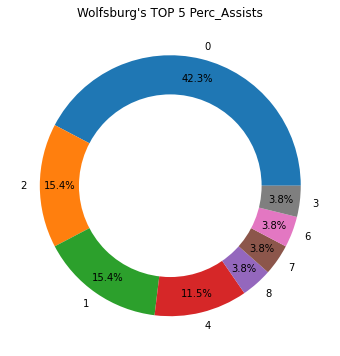

-----------------------------------------------------


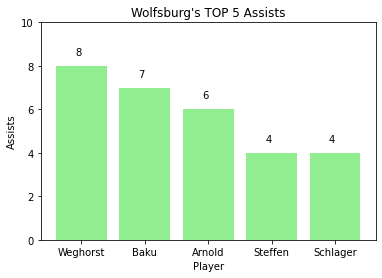

In [ ]:
typeCount = df[df.Club=='Wolfsburg']['Assists'].value_counts(normalize=True)

fig, ax = plt.subplots(figsize=(6,6))

ax.pie(typeCount,
       labels=typeCount.index,
       autopct='%1.1f%%',
       pctdistance=0.85,
       
       )

circle = plt.Circle((0,0),0.70,fc='white')
ax.add_artist(circle)
plt.title("Wolfsburg's TOP 5 Perc_Assists")

plt.show()

print('-----------------------------------------------------')

#####################################################

players = ['Weghorst', 'Baku', 'Arnold', 'Steffen', 'Schlager']
assists = [8, 7, 6, 4, 4]

xs = [i for i, _ in enumerate(players)]
plt.bar(xs, assists, color='lightgreen')
plt.xlabel("Player")
plt.ylabel("Assists")
plt.xticks([i for i, _ in enumerate(players)], players) 
plt.title("Wolfsburg's TOP 5 Assists")
plt.ylim(0, 10)

for index, value in enumerate(assists):
  plt.text(index - 0.1, value + 0.5, str(value))
plt.show()

**골 / 도움 산점도**

Weghorst가 팀 내 최다 득점과 어시스트를 모두 가지고 있기 때문에 혼자 우상단에 위치해 있다.

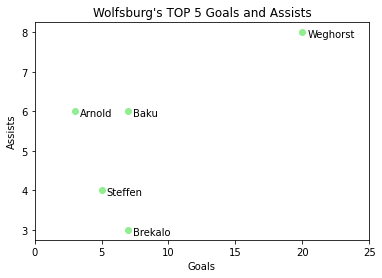

In [ ]:
goals = [20, 7, 7, 5, 3]
assists = [8, 6, 3, 4, 6]
players = ["Weghorst", "Baku", "Brekalo", "Steffen", "Arnold"]
plt.scatter(goals, assists, color='lightgreen')

for goal, assist, player in zip(goals, assists, players):
  plt.annotate(player,xy=(goal, assist),xytext=(5, -5),textcoords="offset points")
plt.title("Wolfsburg's TOP 5 Goals and Assists")
plt.xlim(0, 25)
plt.xlabel("Goals")
plt.ylabel("Assists")
plt.show()

● John Brooks (Passes_Attempted : 1869, Perc_Passes_Completed : 84.8%)와

Maxence Lacroix (Passes_Attempted : 1736, Perc_Passes_Completed : 84.1%)

위 상위권 팀들과 마찬가지로 두 센터백이 패스 시도와 성공률 모두 상위권을 차지했다.

● 데이터를 통해 Brooks와 Lacroix가 3선 자원인 Arnold와 Baku에게 볼을 전달해주고 전달 받은 볼을 전방으로 뿌려주는 플레이가 예상된다. 실제로 Arnold와 Baku는 각각 3골 6도움, 6골 7도움을 기록하여 팀 내 공격포인트 상위권을 차지하고 있다.

In [ ]:
Wolf_pass = Wolf_df.sort_values('Passes_Attempted',ascending=False)
Wolf_pass[['Name','Passes_Attempted', 'Perc_Passes_Completed']]

,Name,Passes_Attempted,Perc_Passes_Completed
82,John Brooks,1869,84.8
86,Maxence Lacroix,1736,84.1
85,Maximilian Arnold,1652,80.1
83,Ridle Baku,1461,75.0
84,Xaver Schlager,1279,77.2
81,Koen Casteels,1247,75.2
90,Kevin Mbabu,1029,69.9
89,Paulo Ot?vio,989,75.0
87,Josip Brekalo,849,75.3
80,Wout Weghorst,832,67.8




---



# **상위권 (1~4위) 팀 개인 골/도움 분석**

In [ ]:
all_goal = df['Club'].str.contains("Bayern Munich|RB Leipzig|Borussia Dortmund|Wolfsburg")
all_df = df[all_goal].sort_values('Goals',ascending=False)
all_df[['Name','Club','Goals']]

# 1~4위 골 TOP5

,Name,Club,Goals
4,Robert Lewandowski,Bayern Munich,41
55,Erling Haaland,Borussia Dortmund,27
80,Wout Weghorst,Wolfsburg,20
1,Thomas M?ller,Bayern Munich,11
9,Serge Gnabry,Bayern Munich,10
...,...,...,...
66,Marwin Hitz,Borussia Dortmund,0
69,Axel Witsel,Borussia Dortmund,0
70,Mateu Morey,Borussia Dortmund,0
72,Nico Schulz,Borussia Dortmund,0


In [ ]:
all_assist = df['Club'].str.contains("Bayern Munich|RB Leipzig|Borussia Dortmund|Wolfsburg")
all_df = df[all_goal].sort_values('Assists',ascending=False)
all_df[['Name','Club','Assists']]

# 1~4위 도움 TOP 5

,Name,Club,Assists
1,Thomas M?ller,Bayern Munich,19
59,Jadon Sancho,Borussia Dortmund,11
58,Rapha?l Guerreiro,Borussia Dortmund,10
6,Kingsley Coman,Bayern Munich,10
5,Joshua Kimmich,Bayern Munich,10
...,...,...,...
66,Marwin Hitz,Borussia Dortmund,0
69,Axel Witsel,Borussia Dortmund,0
72,Nico Schulz,Borussia Dortmund,0
73,Łukasz Piszczek,Borussia Dortmund,0


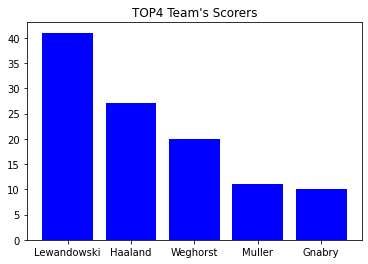

---------------------------------------------------


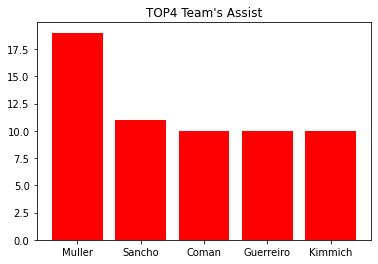

In [ ]:
goals = [41, 27, 20, 11,10]
player = ['Lewandowski','Haaland','Weghorst','Muller','Gnabry']
y_pos = np.arange(len(player))
plt.bar(y_pos, goals, color='blue')
plt.xticks(y_pos, player)
plt.title("TOP4 Team's Scorers")
plt.show()

print('---------------------------------------------------')

################################################################

goals = [19, 11, 10, 10, 10]
player = ['Muller', 'Sancho','Coman','Guerreiro','Kimmich']
y_pos = np.arange(len(player))
plt.bar(y_pos, goals, color='red')
plt.xticks(y_pos, player)
plt.title("TOP4 Team's Assist")
plt.show()



● 득점 상위 5명 중 3명 (Lewandowski, Muller, Gnabry)이 바이에른 뮌헨 소속이다. 이는 바이에른 뮌헨 공격진의 높은 득점력을 나타낸다.

● 2위팀인 라이프치히의 공격진이 골과 도움에서 한명도 없다. 그리고 28골을 기록하며 리그 득점 2위를 차지한 Andre Silva의 소속팀인 아인트라흐트 프랑크푸르트는 리그 5위를 차지하며 챔피언스리그 진출에 실패했다. 이를 통해 개인의 높은 득점력은 팀의 순위를 100% 보장해주진 않는다는 것을 알 수 있다.

실제로 프랑크푸르트의 최종 리그 득점은 69골로 2위 라이프치히의 60골, 4위 볼프스부르크의 61골보다 높았으나 실점은 리그 15위인 빌레벨트보다 많았기 때문에 리그 4위안에 들지 못한 점을 고려하면 수비력이 뒷받침돼 줘야 높은 순위를 기록할 수 있다는 것을 알 수 있다. 또한 라이프치히가 얼마나 효율적인 축구를 구사하였는지도 알 수 있다.

● Thomas Muller는 득점 4위, 도움 1위를 기록하며 상위권 팀 득점/도움 모두 TOP5 안에 들은 유일한 선수다.







---



# **결론**

● 스탯만으로 선수를 평가하는 것은 무리다. 예로 Joshua Kimmich는 4골 10도움을 기록하였지만 팀의 허리축을 담당하여 템포를 조절하거나 전방으로 질 좋은 패스를 뿌려주며 리그 41골을 기록한 Lewandowski만큼 팀의 공격과 수비에서 높은 비중을 차지하였다. 키미히의 볼 배급 능력은 리그를 떠나 유럽에서도 최고였다. 그렇기 때문에 스탯만으로 선수 개개인을 평가해서는 안된다.

● 바이에른 뮌헨은 팀 득점 합산 99골인 압도적인 공격력으로 다른 팀들을 말 그대로 찍어 누르며 우승을 차지하였다. 하지만 우리가 주목해야 할 팀은 준우승 팀인 라이프치히다.

라이프치히는 팀 득점 60골로 5위 프랑크푸르트보다 낮았지만 리그 최저 실점 (32골)을 기록하며 2위를 차지하였다. 물론 선수 개개인의 역량도 좋았지만 나겔스만 감독의 효율적인 전술이 빛을 발한 것이다. 이를 증명하듯이 나겔스만 감독이 뮌헨으로 이적하고 유럽 무대에서도 충분한 경쟁력을 보여줬던 라이프치히는 현재 부진을 면치 못하고 있다. 물론 팀의 공/수 핵심이었던 자비처와 우파메카노의 동반 뮌헨 이적도 영향이 있다.

● 상위권 팀들 모두 수비진들이 패스 시도와 패스 성공률에서 높은 기록을 보여주고 있다. 물론 포지션상 수비진들이 볼을 가장 많이 터치하기 때문에 이런 결과가 나타날 수 있지만 이는 공격 과정에서도 수비수들이 결코 적지 않은 비중을 차지하고 있다는 결과를 나타내기도 한다. 그렇기 때문에 피지컬뿐만 아니라 발기술이 좋고 빠른 수비수들이 현대 축구에서도 높은 평가를 받고 있다.
또한 수비수는 Mats Hummels처럼 직접적으로 골을 넣는 것 뿐만 아니라 세트피스 상황에서 볼을 따내면서 골에 간접적으로 관여하는 좋은 공격 옵션이 될 수 있다.
수비수가 수비만 한다는 생각은 이미 구식이 된지 오래다. 이는 바이에른 뮌헨의 Manuel Neuer의 데이터를 통해 골키퍼에게도 해당될 수 있다.






